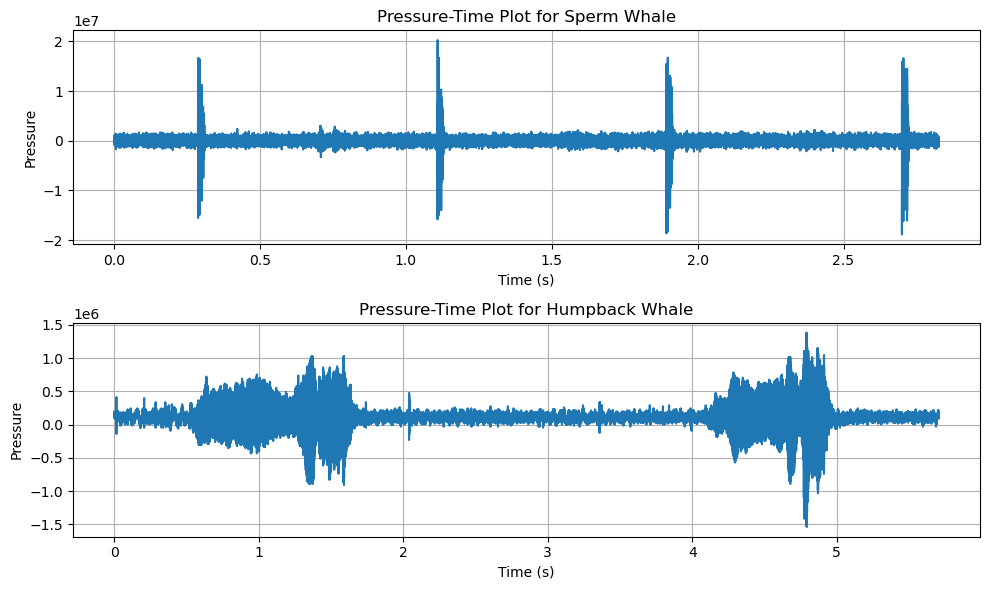

In [7]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def convert_to_pressure(y, sensitivity):
    GF = 0.16
    pressure = (3.5 * y * GF) / (10**(sensitivity / 20))
    return pressure

y_sperm, sr_sperm = librosa.load('85005006.wav', sr=None)
y_humpback, sr_humpback = librosa.load('9220100Q.wav', sr=None)

pressure_sperm = convert_to_pressure(y_sperm, -155)
pressure_humpback = convert_to_pressure(y_humpback, -155)

time_sperm = np.arange(len(y_sperm)) / sr_sperm
time_humpback = np.arange(len(y_humpback)) / sr_humpback

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_sperm, pressure_sperm)
plt.title('Pressure-Time Plot for Sperm Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_humpback, pressure_humpback)
plt.title('Pressure-Time Plot for Humpback Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
import numpy as np

def calculate_prms(pressure):
    prms = np.sqrt(np.mean(pressure**2))
    return prms

def calculate_spl(prms):
    pref = 1e-6  # 1 µPa
    spl_rms = 20 * np.log10(prms / pref)
    return spl_rms

prms_sperm = calculate_prms(pressure_sperm)

prms_humpback = calculate_prms(pressure_humpback)

spl_sperm = calculate_spl(prms_sperm)

spl_humpback = calculate_spl(prms_humpback)

print(prms_sperm, prms_humpback, spl_sperm, spl_humpback)


784971.1 195801.56 237.8970736321329 225.83632306317492


In [9]:
import numpy as np

p = pressure_sperm 

P = np.fft.fft(p)

energy_time_domain = np.sum(np.abs(p)**2)

energy_frequency_domain = np.sum(np.abs(P)**2) / len(P)

print("Energy in time domain:", energy_time_domain) 
print("Energy in frequency domain:", energy_frequency_domain)

Energy in time domain: 1.4267764e+17
Energy in frequency domain: 1.4267763202167112e+17


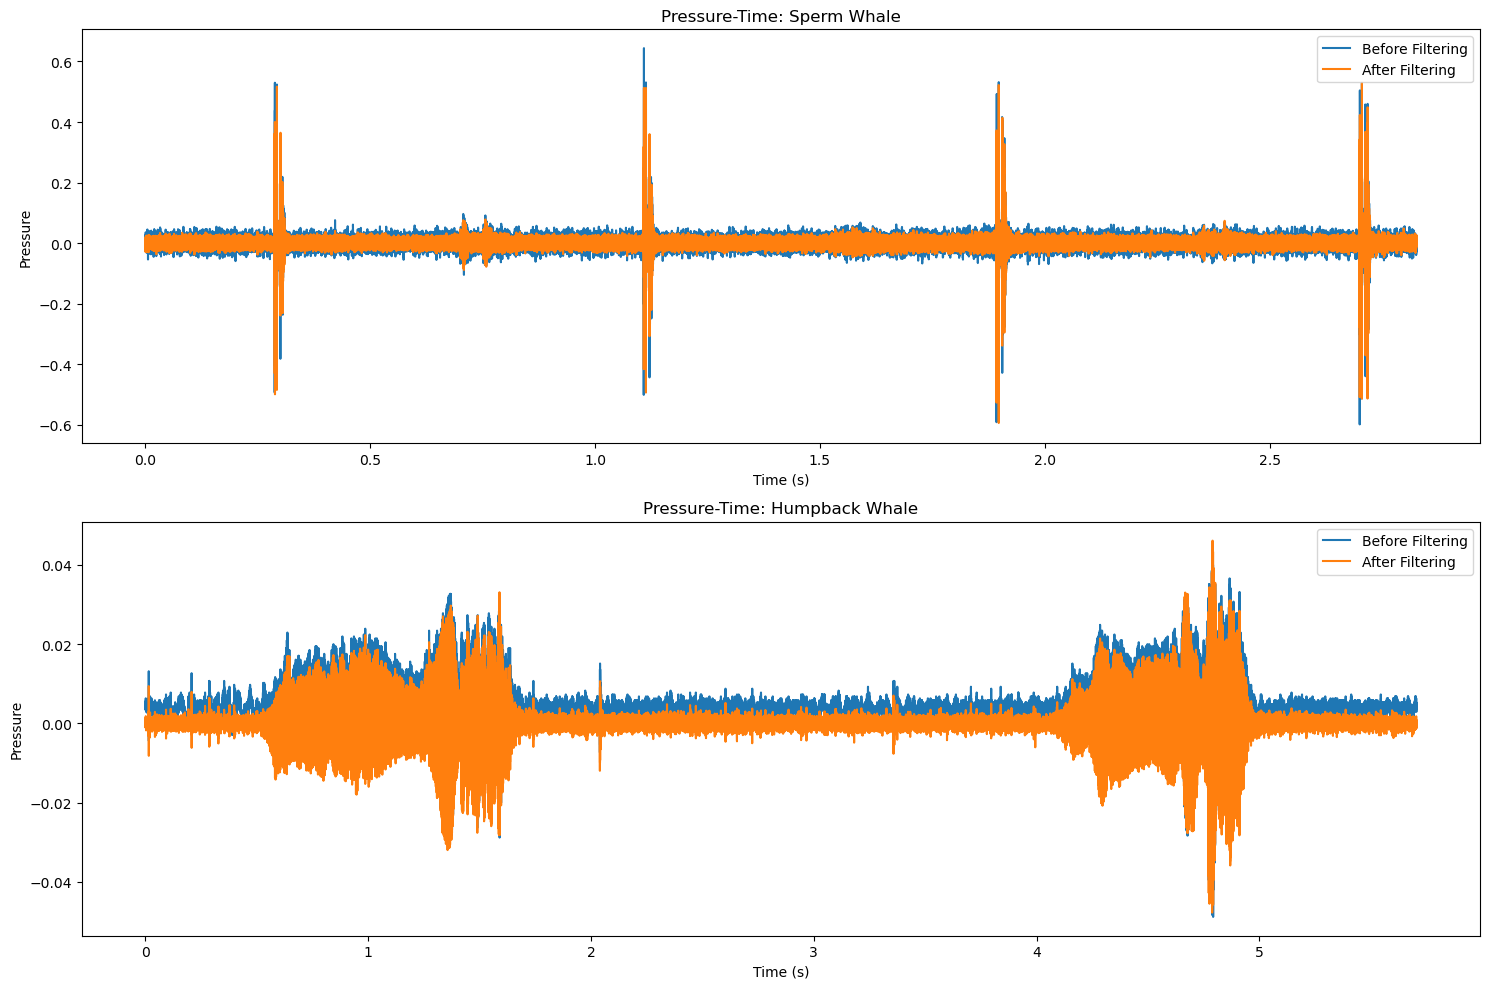

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import librosa

cutoff_freq = 200

b, a = butter(3, cutoff_freq / (sr / 2), btype='high')

filtered_y_sperm = filtfilt(b, a, y_sperm)
filtered_y_humpback = filtfilt(b, a, y_humpback)

plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y_sperm)) / sr_sperm, y_sperm, label='Before Filtering')
plt.plot(np.arange(len(filtered_y_sperm)) / sr_sperm, filtered_y_sperm, label='After Filtering')
plt.title('Pressure-Time: Sperm Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y_humpback)) / sr_humpback, y_humpback, label='Before Filtering')
plt.plot(np.arange(len(filtered_y_humpback)) / sr_humpback, filtered_y_humpback, label='After Filtering')
plt.title('Pressure-Time: Humpback Whale')
plt.xlabel('Time (s)')
plt.ylabel('Pressure')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
import numpy as np
import librosa
import scipy.signal

GF = 0.16
Sensitivity = -175  # dB relative to 1V/µPa
pref = 1e-6  # 1 µPa

filename = "Pile driving.wav"
y, sr = librosa.load(filename, sr=None)

pressure = 3.5 * y * GF / (10**(Sensitivity / 20))
prms = np.sqrt(np.mean(pressure**2))
SPL = 20 * np.log10(prms / pref)
threshold_SPL = 100  # dB

if SPL > threshold_SPL:
    print("Ο ήχος υπερβαίνει το κατώφλι των 100 dB.")
    print(f"Επίπεδο ηχητικής πίεσης (SPL): {SPL:.2f} dB")
else:
    print("Ο ήχος δεν υπερβαίνει το κατώφλι των 100 dB.")
    print(f"Επίπεδο ηχητικής πίεσης (SPL): {SPL:.2f} dB")

Ο ήχος υπερβαίνει το κατώφλι των 100 dB.
Επίπεδο ηχητικής πίεσης (SPL): 285.15 dB


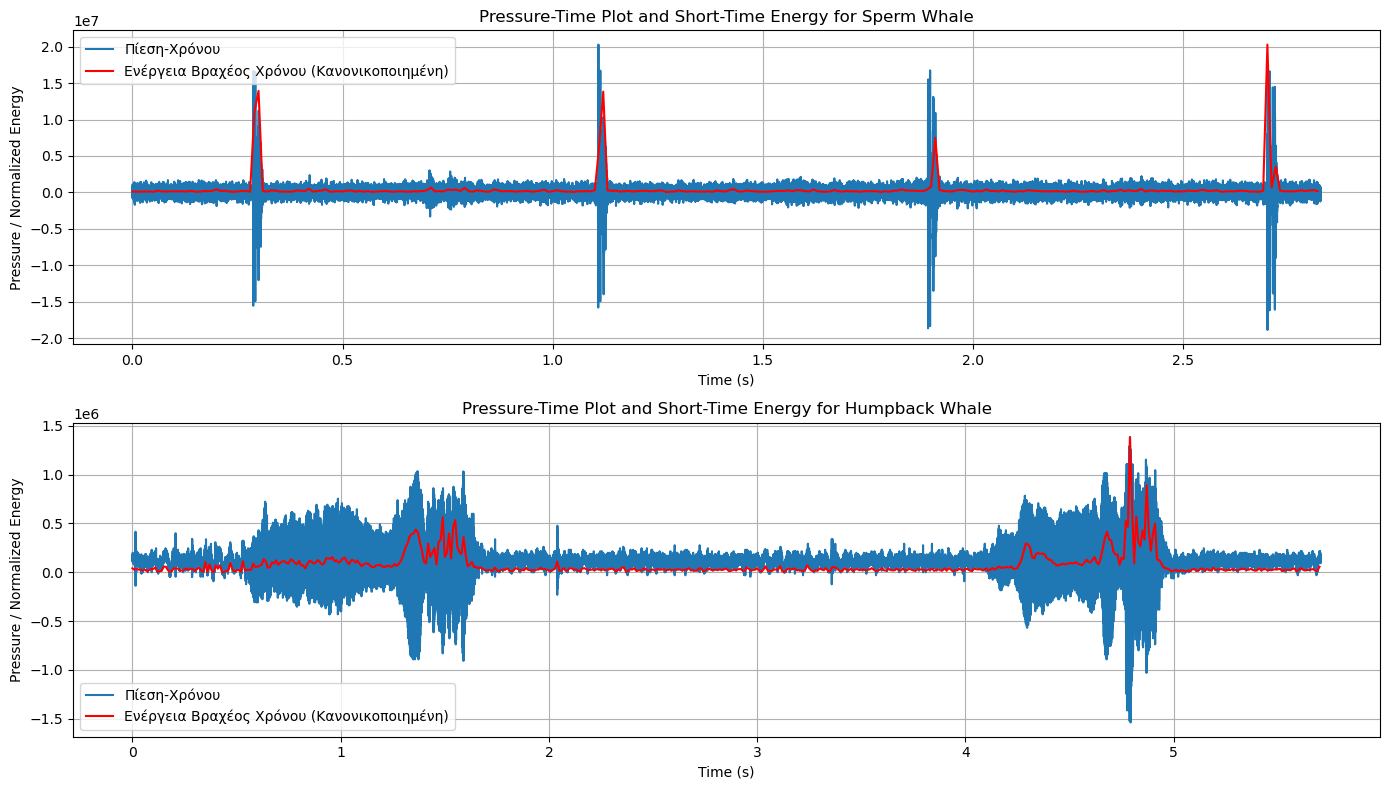

In [12]:
import librosa
import numpy as np
import matplotlib.pyplot as plt


def short_time_energy(signal, frame_length, frame_shift, sr):

    frame_length_samples = int(frame_length * sr)
    frame_shift_samples = int(frame_shift * sr)
    energy = np.array([sum(abs(signal[i:i+frame_length_samples])**2)
                       for i in range(0, len(signal)-frame_length_samples, frame_shift_samples)])
    return energy


filenames = ["85005006.wav", "9220100Q.wav"]
sensitivities = [-155, -155] 
titles = ['Sperm Whale', 'Humpback Whale']

plt.figure(figsize=(14, 8))

for index, (filename, sensitivity, title) in enumerate(zip(filenames, sensitivities, titles), 1):
    y, sr = librosa.load(filename, sr=None)
    pressure = convert_to_pressure(y, sensitivity)
    time = np.arange(len(y)) / sr
    energy = short_time_energy(y, 0.0025, 0.01, sr)
    energy_time = np.arange(len(energy)) * 0.01      
    plt.subplot(2, 1, index)
    plt.plot(time, pressure, label='Πίεση-Χρόνου')
    plt.plot(energy_time, energy / np.max(energy) * np.max(pressure), label='Ενέργεια Βραχέος Χρόνου (Κανονικοποιημένη)', color='r')
    plt.title(f'Pressure-Time Plot and Short-Time Energy for {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Pressure / Normalized Energy')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

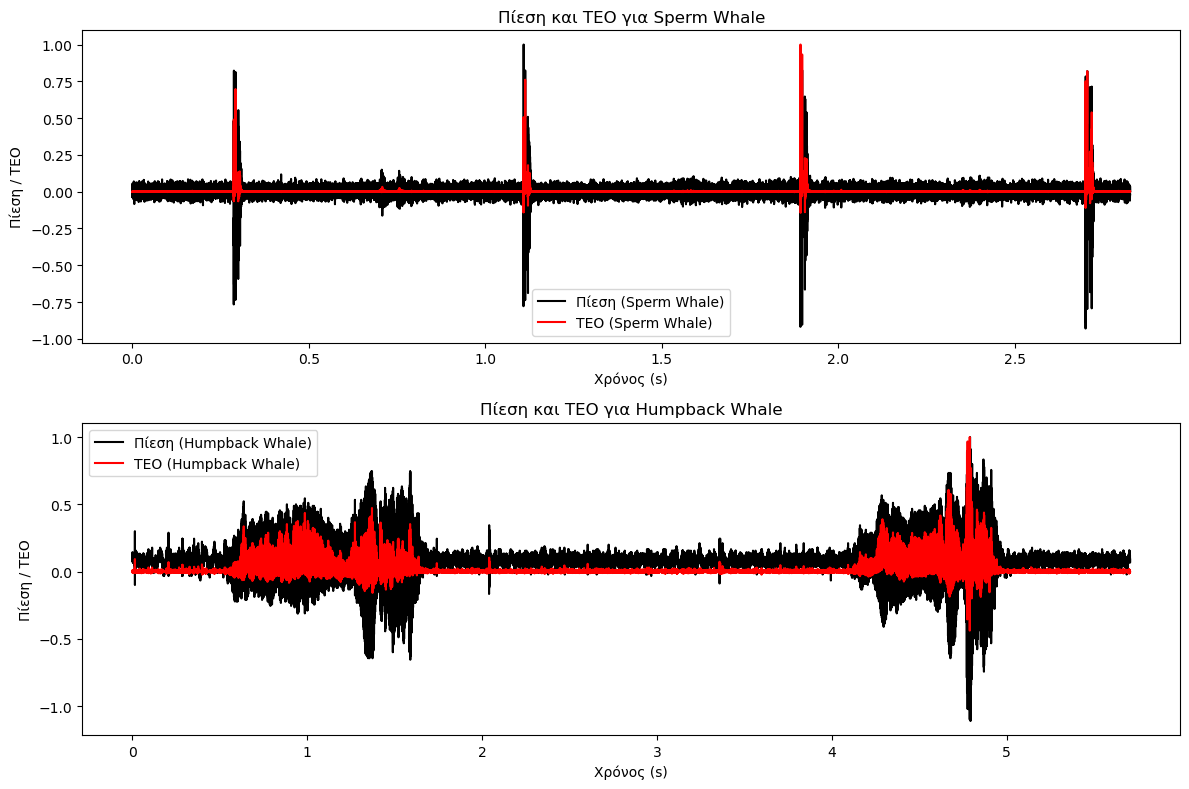

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

def teager_energy_operator(signal):
    tkeo_values = [0] * len(signal) 

    for i in range(1, len(signal) - 1):
        tkeo_values[i] = signal[i]**2 - signal[i-1] * signal[i+1]

    return tkeo_values

pressure_sperm_teager = teager_energy_operator(pressure_sperm)
pressure_humpback_teager = teager_energy_operator(pressure_humpback)

time_sperm = np.arange(len(pressure_sperm)) / sr_sperm
time_humpback = np.arange(len(pressure_humpback)) / sr_humpback

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(time_sperm, pressure_sperm/np.max(pressure_sperm), label='Πίεση (Sperm Whale)', color='black')
plt.plot(time_sperm, pressure_sperm_teager/np.max(pressure_sperm_teager), label='TEO (Sperm Whale)', color='red')
plt.title('Πίεση και TEO για Sperm Whale')
plt.xlabel('Χρόνος (s)')
plt.ylabel('Πίεση / TEO')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_humpback, pressure_humpback/np.max(pressure_humpback), label='Πίεση (Humpback Whale)', color='black')
plt.plot(time_humpback, pressure_humpback_teager/np.max(pressure_humpback_teager), label='TEO (Humpback Whale)', color='red')
plt.title('Πίεση και TEO για Humpback Whale')
plt.xlabel('Χρόνος (s)')
plt.ylabel('Πίεση / TEO')
plt.legend()

plt.tight_layout()
plt.show()

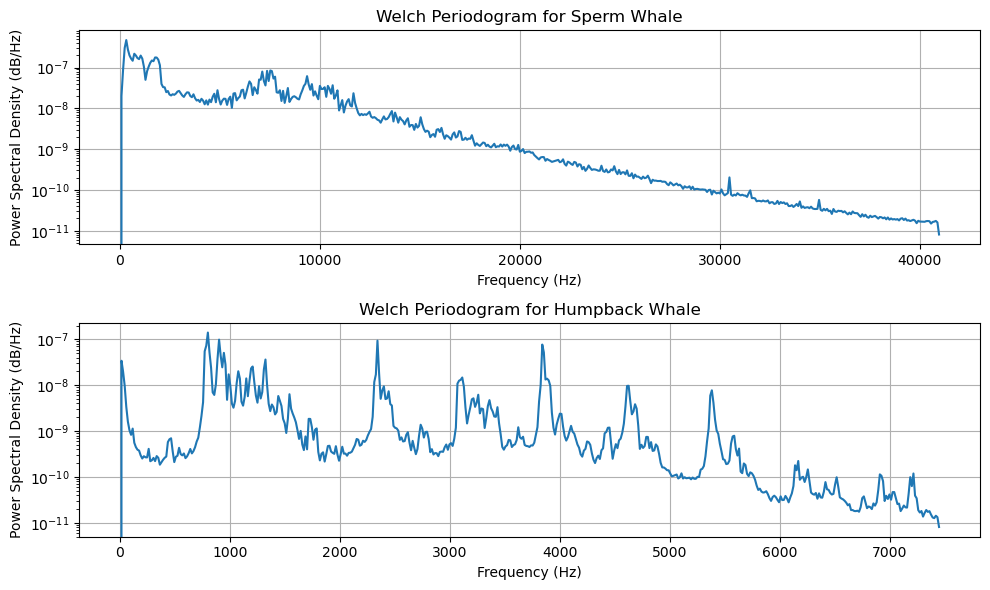

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

frequencies_sperm, Pxx_sperm = welch(y_sperm, sr_sperm, 'boxcar', nperseg=1024)
frequencies_humpback, Pxx_humpback = welch(y_humpback, sr_humpback, 'boxcar', nperseg=1024)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_sperm, Pxx_sperm)
plt.title('Welch Periodogram for Sperm Whale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.semilogy(frequencies_humpback, Pxx_humpback)
plt.title('Welch Periodogram for Humpback Whale')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.grid(True)

plt.tight_layout()
plt.show()

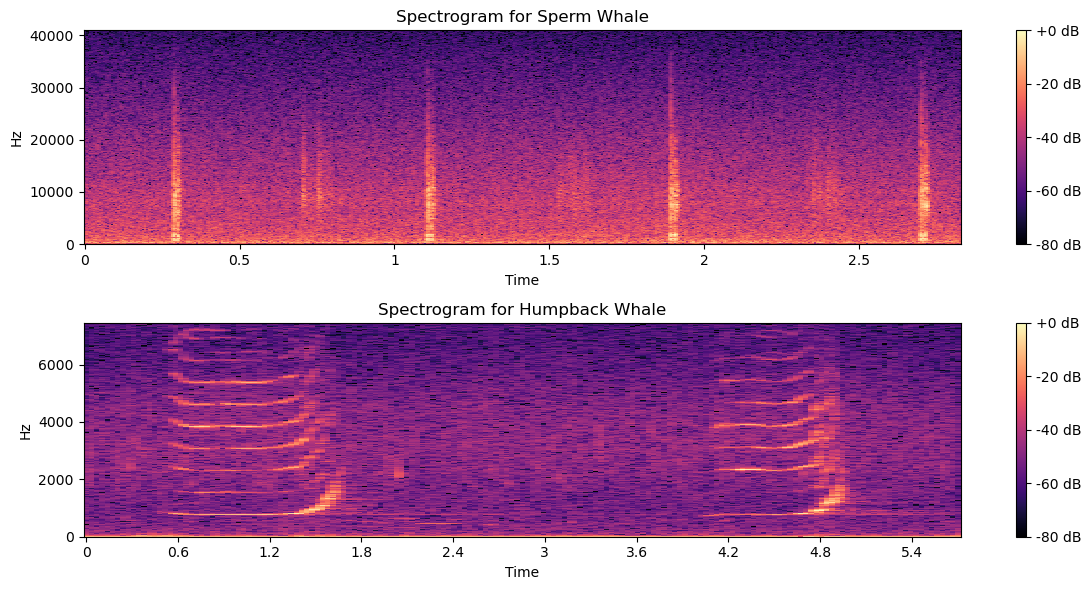

In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

D_sperm = librosa.amplitude_to_db(np.abs(librosa.stft(y_sperm)), ref=np.max)
D_humpback = librosa.amplitude_to_db(np.abs(librosa.stft(y_humpback)), ref=np.max)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(D_sperm, sr=sr_sperm, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Sperm Whale')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_humpback, sr=sr_humpback, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram for Humpback Whale')

plt.tight_layout()
plt.show()

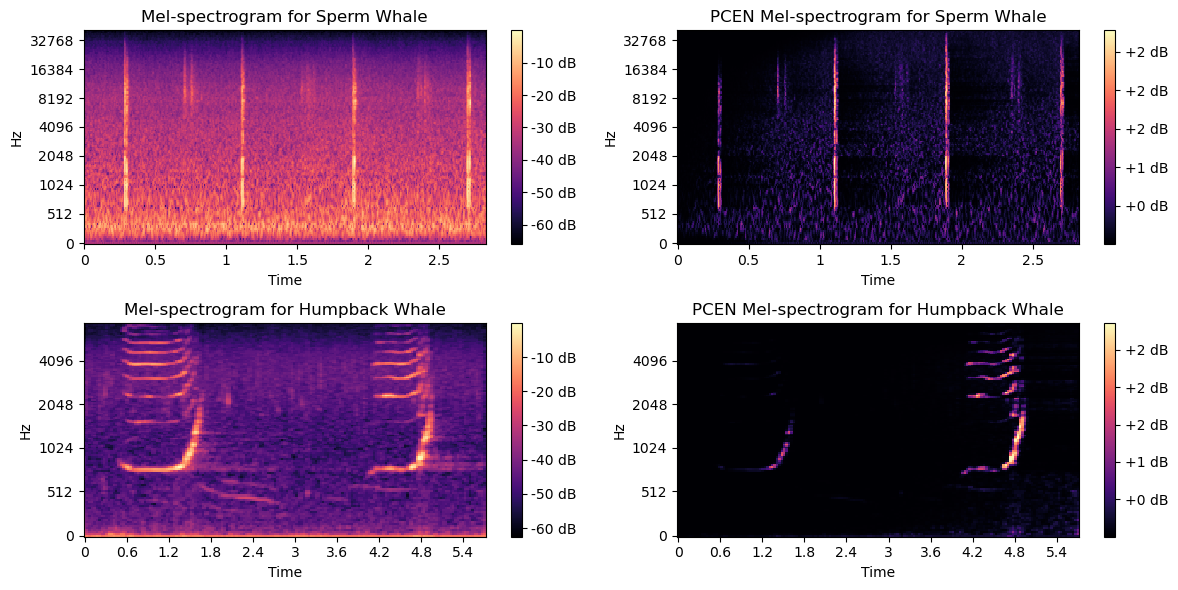

In [16]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

mel_spectrogram_sperm = librosa.feature.melspectrogram(y=y_sperm, sr=sr_sperm)
mel_spectrogram_humpback = librosa.feature.melspectrogram(y=y_humpback, sr=sr_humpback)

pcen_sperm = librosa.pcen(mel_spectrogram_sperm)
pcen_humpback = librosa.pcen(mel_spectrogram_humpback)

plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_sperm, ref=np.max), sr=sr_sperm, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram for Sperm Whale')

plt.subplot(2, 2, 2)
librosa.display.specshow(pcen_sperm, sr=sr_sperm, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('PCEN Mel-spectrogram for Sperm Whale')

plt.subplot(2, 2, 3)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_humpback, ref=np.max), sr=sr_humpback, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram for Humpback Whale')

plt.subplot(2, 2, 4)
librosa.display.specshow(pcen_humpback, sr=sr_humpback, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('PCEN Mel-spectrogram for Humpback Whale')

plt.tight_layout()
plt.show()